In [1]:
import re
import praw
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reddit = praw.Reddit(
    client_id="7U9E7bnmxqEKk0Pw_08p0w",
    user_agent="Windows:7U9E7bnmxqEKk0Pw_08p0w:1.0 (by /u/IFoundAGoodName)",
    client_secret=None,
    username="IFoundAGoodName",
    password="NickFC67*"
)

safemoon_subreddit = reddit.subreddit("Safemoon")

comments = []
for comment in safemoon_subreddit.comments(limit=1000000):
    comments.append(comment.body)



In [2]:
# for comment in comments[:5]:
#     print(comment)


In [3]:
post_data = []
comment_data = []

num_posts = 1000000
num_comments = 1000000

posts = safemoon_subreddit.new(limit=num_posts)

# Iterate over the posts and store relevant data
for post in posts:
    post_data.append({
        'Title': post.title,
        'Score': post.score,
        'URL': post.url,
        'Timestamp': pd.to_datetime(post.created_utc, unit='s'),
    })

for comment in safemoon_subreddit.comments(limit=1000000):
    comment_data.append({
        'Comment': comment.body,
        'Score': comment.score,
        'Timestamp': pd.to_datetime(comment.created_utc, unit='s'),
    })

    # Create DataFrames from the collected data
post_df = pd.DataFrame(post_data)
comment_df = pd.DataFrame(comment_data)

# Print the first few rows of each DataFrame
# print("Post Data:")
print(post_df.head())
# print("\nComment Data:")
print(comment_df.head())

                                               Title  Score  \
0  I reviewed the SafeMoon Wikipedia page. Is Pro...     32   
1  All crypto including Safemoon is up today 😃 CB...     21   
2                                        Safemoon V2     10   
3  Latest update breaks Reddit collectible avatar...     21   
4                                 How to buy in USA?     22   

                                                 URL           Timestamp  
0  https://www.reddit.com/r/SafeMoon/comments/14f... 2023-06-21 19:48:00  
1  https://www.reddit.com/r/SafeMoon/comments/14f... 2023-06-21 17:16:06  
2  https://www.reddit.com/r/SafeMoon/comments/14e... 2023-06-20 16:18:30  
3                https://i.redd.it/9mv86pyojn6b1.jpg 2023-06-17 22:11:12  
4  https://www.reddit.com/r/SafeMoon/comments/14c... 2023-06-17 21:57:55  
                                             Comment  Score  \
0  ###[Scamming](https://www.reddit.com/r/safemoo...      1   
1  Karony and the team are living their best 

In [4]:
post_df.sort_values(by="Score", ascending=False)

,Title,Score,URL,Timestamp
877,Words from Karony 🤘🏻,372,https://i.redd.it/vq7hqh381oha1.jpg,2023-02-11 21:06:05
607,Liquidity “Compromised”,354,https://i.redd.it/wlt7cy8i8lqa1.jpg,2023-03-28 21:18:55
650,BULLISH 🚀 🌙,335,https://i.redd.it/bzofaqxkoepa1.jpg,2023-03-22 22:12:41
240,I left SFM today,289,https://www.reddit.com/r/SafeMoon/comments/134...,2023-05-01 18:08:51
327,SafeMoon have reached a “deal with the hacker.”,288,https://i.redd.it/bfygvfiyvoua1.jpg,2023-04-18 13:52:06
...,...,...,...,...
712,Are you ready to add another zero?,0,https://www.reddit.com/r/SafeMoon/comments/11q...,2023-03-13 05:57:30
416,Unable to login to Safemoon Wallet,0,https://www.reddit.com/r/SafeMoon/comments/12e...,2023-04-07 11:05:34
289,How much have you made so far for reflection?,0,https://www.reddit.com/r/SafeMoon/comments/12w...,2023-04-23 11:16:43
290,SafeMoon Daily Discussion Post,0,https://www.reddit.com/r/SafeMoon/comments/12w...,2023-04-23 10:01:09


In [5]:
comment_df.sort_values(by="Score", ascending=False)

,Comment,Score,Timestamp
329,You're full of shit,89,2023-06-17 02:07:53
54,You'll notice no one answering your questions ...,87,2023-06-22 01:28:48
754,I put about 2k in. It’s now worth $150……. So I...,55,2023-06-10 13:29:40
520,2+ years later and we have our 3rd iteration o...,53,2023-06-14 21:57:31
690,It’s too late to sell. You missed that boat. N...,46,2023-06-11 16:43:15
...,...,...,...
167,Because this is a scam.,-18,2023-06-19 07:26:51
63,Check out the Safemoon Twitter and YouTube cha...,-19,2023-06-21 21:12:38
659,This poll just proves how many haters are on t...,-19,2023-06-12 15:21:19
152,Because its a scam and your spam posting.\n\n&...,-20,2023-06-19 20:09:35


In [6]:
import re

cleaned_comments = []
for comment in comments:
    cleaned_comment = re.sub(r"[^a-zA-Z\s]", "", comment)  # Remove non-alphabetic characters
    cleaned_comments.append(cleaned_comment)



In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sidne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
tokenized_comments = []
for comment in cleaned_comments:
    tokens = word_tokenize(comment)
    tokenized_comments.append(tokens)


In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stop_words = set(stopwords.words("english"))

filtered_comments = []
for tokens in tokenized_comments:
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words if len(token) <= 15]
    filtered_comments.append(filtered_tokens)


In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sidne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
lemmatizer = WordNetLemmatizer()

lemmatized_comments = []
for tokens in filtered_comments:
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_comments.append(lemmatized_tokens)

for tokens in lemmatized_comments[:5]:
    print(tokens)


['rule', 'report', 'scam', 'Reddit', 'administrator']
['Karony', 'team', 'living', 'best', 'life', 'million', 'stole', 'Id', 'say', 'thats', 'accurate', 'recap']
['PSA', 'Please', 'familiarize', 'subreddit', 'v', 'v', 'Migration', 'Safemoon', 'fully', 'transitioned', 'away', 'v', 'fully', 'v', 'v', 'transaction', 'send', 'token', 'buy', 'token', 'sell', 'token', 'incur', 'tax', 'word', 'lose', 'Safemoon', 'MUST', 'migrate', 'v', 'using', 'step', 'outlined', 'Additional', 'info', 'Dont', 'promote', 'pump', 'event', 'market', 'manipulation', 'Dont', 'harass', 'others', 'including', 'public', 'figure', 'exchange', 'Please', 'helpful', 'friendly', 'respectful', 'action', 'reflect', 'entire', 'community', 'WARNING', 'Never', 'give', 'wallet', 'passphrase', 'reason', 'suspicious', 'URLs', 'email', 'form', 'direct', 'message', 'someone', 'claim', 'support', 'trying', 'scam', 'someone', 'claim', 'need', 'validate', 'trying', 'scam', 'disclose', 'asset', 'bot', 'action', 'performed', 'automatic

In [13]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sidne\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
# Applying Sentiment analysis on the lemmatized tokens
sia = SentimentIntensityAnalyzer()

sentiment_scores = []
for tokens in lemmatized_comments:
    comment = " ".join(tokens)  # Convert the list of tokens back to a string
    sentiment_score = sia.polarity_scores(comment)
    sentiment_scores.append(sentiment_score)

positive_comments = []
negative_comments = []
neutral_comments = []

for i, score in enumerate(sentiment_scores):
    if score["compound"] >= 0.2:
        positive_comments.append(comments[i])
    elif score["compound"] <= -0.2:
        negative_comments.append(comments[i])
    else:
        neutral_comments.append(comments[i])

compound_scores = [score['compound'] for score in sentiment_scores]
comment_df['Compound_Score'] = compound_scores

total_comments = len(sentiment_scores)
positive_percentage = len(positive_comments) / total_comments * 1000000
negative_percentage = len(negative_comments) / total_comments * 1000000
neutral_percentage = len(neutral_comments) / total_comments * 1000000

print("Sentiment Distribution:")
print(f"Positive: {positive_percentage:.2f}%")
print(f"Negative: {negative_percentage:.2f}%")
print(f"Neutral: {neutral_percentage:.2f}%")


Sentiment Distribution:
Positive: 472295.51%
Negative: 201846.97%
Neutral: 325857.52%


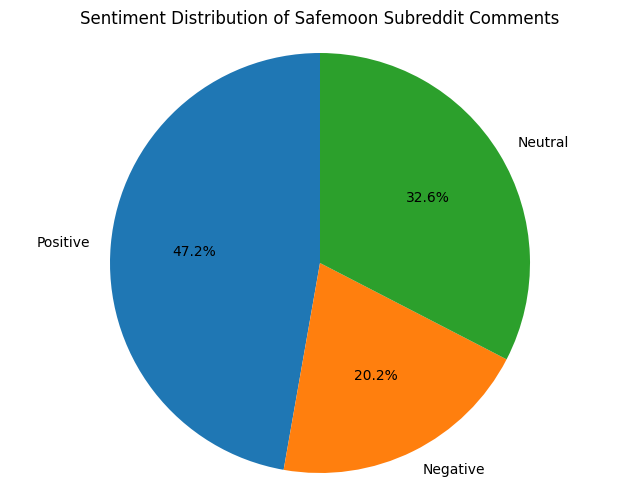

In [15]:
sentiment_labels = ["Positive", "Negative", "Neutral"]
sentiment_counts = [len(positive_comments), len(negative_comments), len(neutral_comments)]

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution of Safemoon Subreddit Comments")
plt.axis('equal')
plt.show()

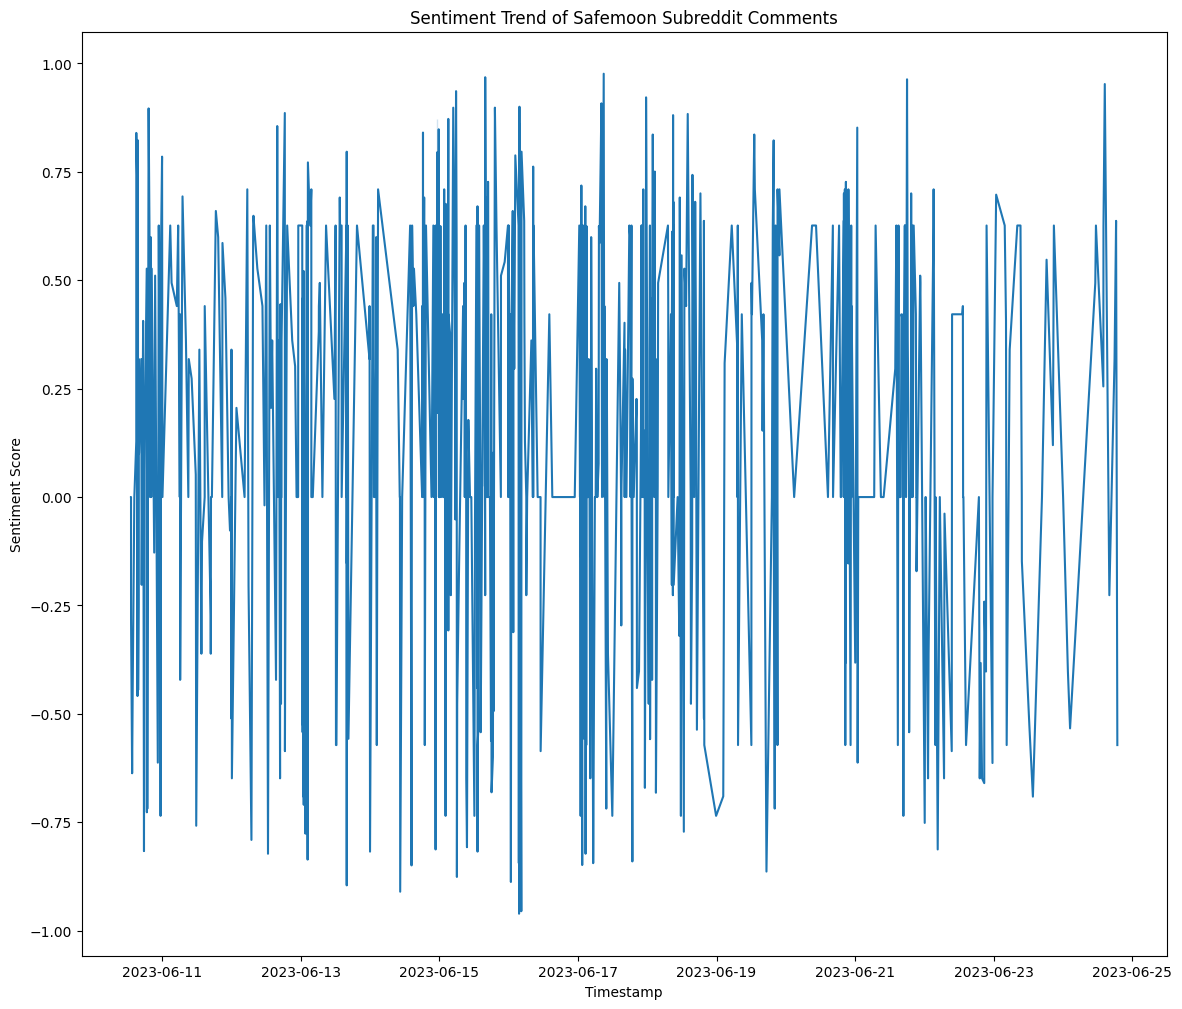

In [16]:
comment_df['Timestamp'] = pd.to_datetime(comment_df['Timestamp'])
plt.figure(figsize=(14, 12))
sns.lineplot(data=comment_df, x='Timestamp', y='Compound_Score')
plt.title("Sentiment Trend of Safemoon Subreddit Comments")
plt.xlabel("Timestamp")
plt.ylabel("Sentiment Score")
plt.show()

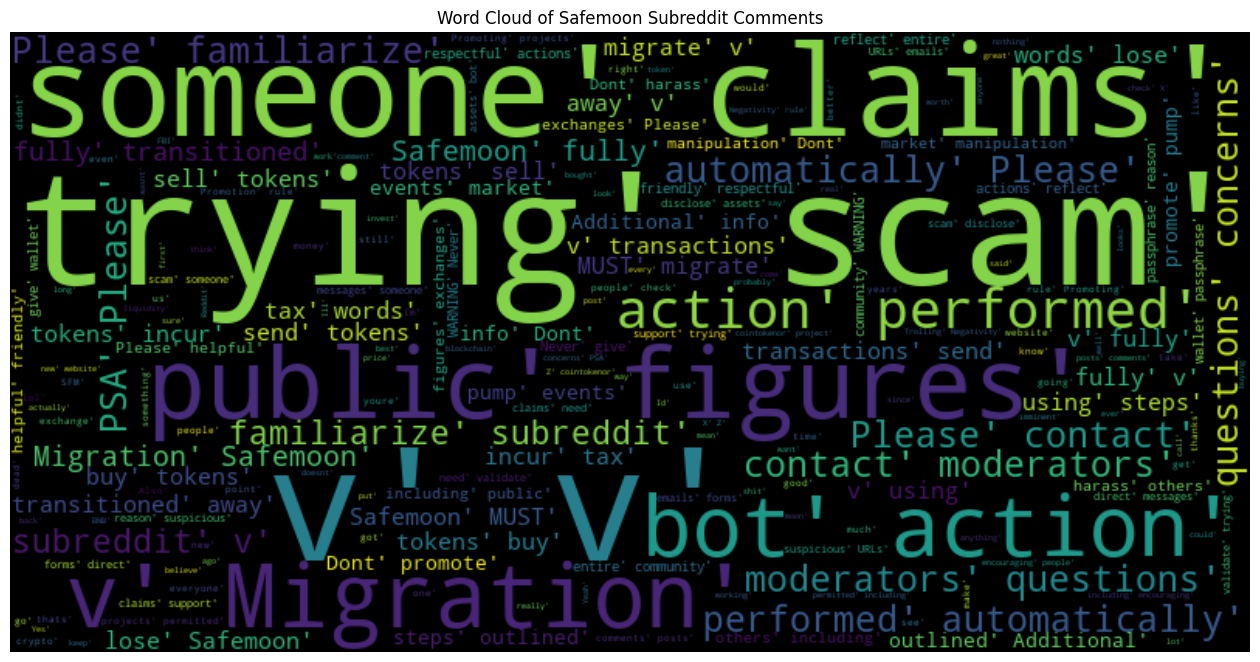

In [26]:
wordcloud = WordCloud(width=800, height=400).generate(f"{filtered_comments}")

plt.figure(figsize=(16, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Safemoon Subreddit Comments")
plt.show()


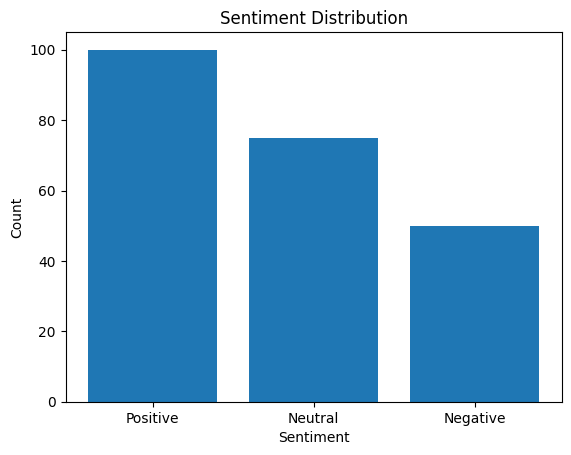

In [18]:
sentiment_counts = {'Positive': 100, 'Neutral': 75, 'Negative': 50}
sentiments = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

plt.bar(sentiments, counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()
